# Twitter Sentiment Analysis

__What is Sentiment Analysis?__

Sentiment analysis (also known as opinion mining) is one of the many applications of Natural Language Processing. It is a set of methods and techniques used for extracting subjective information from text or speech, such as opinions or attitudes. In simple terms, it involves classifying a piece of text as positive, negative .

__Contribution__

| ID          | Email                              | Name               |
|-------------|------------------------------------|--------------------|
| 2020fc04064 | 2020fc04064@wilp.bits-pilani.ac.in | Subodh Kant Mishra |
| 2020fc04409 | 2020fc04409@wilp.bits-pilani.ac.in | Rahul Bhardwaj     |
| 2020fc04072 | 2020fc04072@wilp.bits-pilani.ac.in | Ashutosh Dhok      |


In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import preprocessor as p
import gensim
import gensim.downloader as gensim_api


In [2]:
#!pip install -U wordcloud
#!pip install -U plotly plotly-express
#!pip install -U spacy
# for word embedding
#!pip install -U gensim
#!pip install tweet-preprocessor
# nlp = spacy.load('en_core_web_sm')
import nltk
# nltk.download('wordnet')


In [3]:
# Importing the training dataset
DATASET_COLUMNS = ['id', 'label', 'tweet']
df_train = pd.read_csv(
    'https://raw.githubusercontent.com/prateekjoshi565/twitter_sentiment_analysis/master/train_E6oV3lV.csv', names=DATASET_COLUMNS, header=0)
df_train.sample(5)


,id,label,tweet
30225,30226,0,why dont pedestrains walk single file at shopp...
11402,11403,0,able to catch the last #eclipse show on broadw...
26461,26462,0,friday i'm in love ððð #tgifridays #v...
28352,28353,1,verified: shocking video of #myanmar police to...
571,572,1,fox new just coming out and saying it bluntly....


In [4]:
# Length of the dataset

print('length of train data is', len(df_train))
df_train.describe()


length of train data is 31962


,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
# Importing the Testing dataset
DATASET_COLUMNS = ['id', 'tweet']
df_test = pd.read_csv(
    'https://raw.githubusercontent.com/prateekjoshi565/twitter_sentiment_analysis/master/test_tweets_anuFYb8.csv', names=DATASET_COLUMNS, header=0)
df_test.sample(5)


,id,tweet
11312,43275,#bleh from neo! #smile #shihtzu #dog #dogsof...
8318,40281,when im drunk i soa use the attractiveness of ...
7539,39502,italy fans aren't happy thiago motta has no ...
9141,41104,hillary - trump war on twitter! this election ...
9121,41084,@user friday @user @user @user @user @user ...


In [6]:
# Length of the dataset

print('length of test data is', len(df_test))


length of test data is 17197


In [7]:
# Check the Null Values in test and train data
print('length of null value in train data is', df_train.isnull().any().sum())
print('length of null value in test data is', df_test.isnull().any().sum())


length of null value in train data is 0
length of null value in test data is 0


In [8]:
# Check the of target values
df_train['label'].unique()


array([0, 1], dtype=int64)

In [9]:
# Check the twee sample with label as 0
df_train[df_train['label'] == 0].sample(5)


,id,label,tweet
23901,23902,0,one of my fave desses!! â¤ï¸ #pancake #desse
29799,29800,0,my wee princess finally able to ride a bike. h...
652,653,0,@user ready for @user at #ccmf2016 !! #mychu...
18123,18124,0,new year from #hawaii! |
9763,9764,0,regram @user #goodmorning #selfie #day #brun...


In [10]:
# Check the twee sample with label as 1
df_train[df_train['label'] == 1].sample(5)


,id,label,tweet
17762,17763,1,as if reel are letting girls in first and ther...
790,791,1,@user and you keep telling that only aryans ar...
9976,9977,1,you might be a libtard if... #libtard #sjw #l...
21874,21875,1,@user @user @user @user where's the ? you need...
2923,2924,1,how the #altright uses &amp; insecurity to lu...


<AxesSubplot:xlabel='label', ylabel='count'>

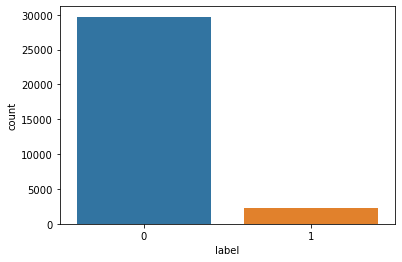

In [11]:
# Plotting the distribution for dataset.
sns.countplot(x='label', data=df_train)
# Storing data in lists.
#text, sentiment = list(df_train['tweet']), list(df_train['label'])


In [12]:
# Plotting the distribution for dataset based on label
fig = px.pie(df_train, names=df_train.label, hole=0.7, title='Tweets Classification',
             height=250, color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(margin=dict(t=100, b=40, l=60, r=40),
                  plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                  title_font=dict(size=25, color='#a5a7ab',
                                  family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  )
fig.show()


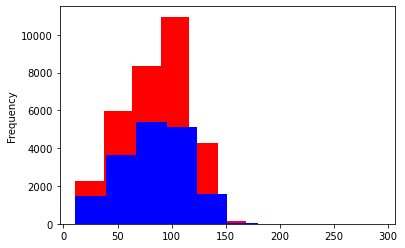

In [13]:
# checking the distribution of tweets in the data

length_train = df_train['tweet'].str.len(
).plot.hist(color='red', figsize=(6, 4))
length_test = df_test['tweet'].str.len().plot.hist(
    color='blue', figsize=(6, 4))


In [14]:
# adding a column to represent the length of the tweet

df_train['len'] = df_train['tweet'].str.len()
df_test['len'] = df_test['tweet'].str.len()

df_train.head(10)


,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [15]:
df_train.groupby('label').describe()


id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

#### Word Count per Label

In [16]:
df_train['word_counts'] = df_train['tweet'].str.split().str.len()
df_train.groupby('label')['word_counts'].mean()


label
0    13.091252
1    14.053078
Name: word_counts, dtype: float64

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

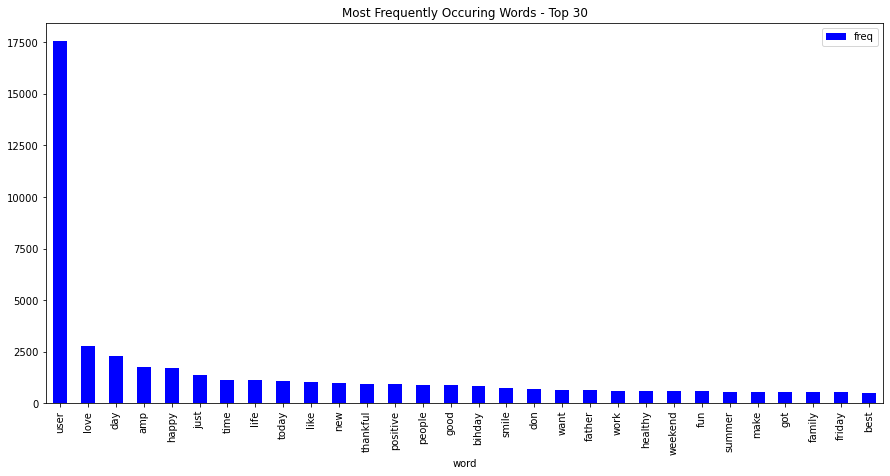

In [17]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df_train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar',
                        figsize=(15, 7), color='blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Tweet Review')

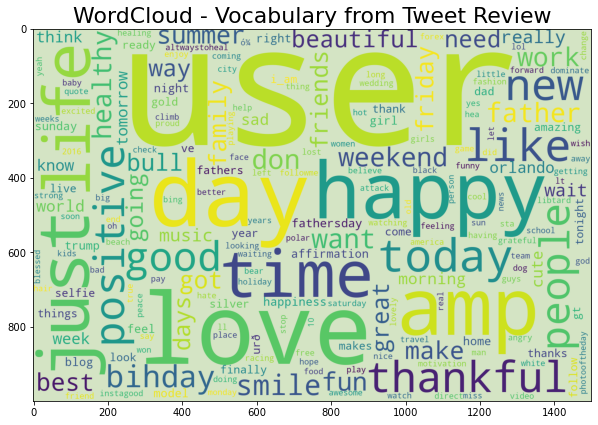

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='#d4e4c4', width=1500,
                      height=1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Tweet Review", fontsize=22)


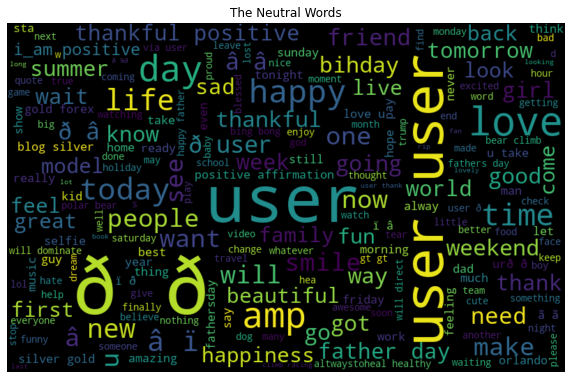

In [19]:
normal_words = ' '.join(
    [text for text in df_train['tweet'][df_train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=0,
                      max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


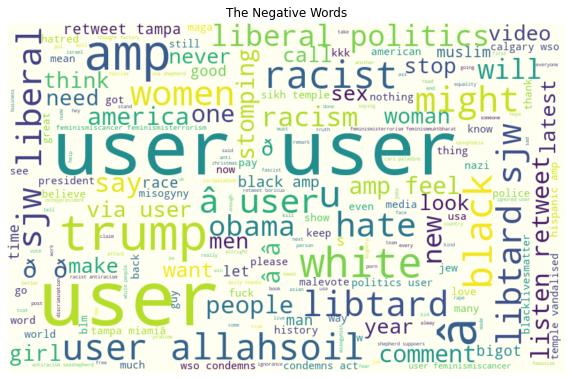

In [20]:
negative_words = ' '.join(
    [text for text in df_train['tweet'][df_train['label'] == 1]])

wordcloud = WordCloud(background_color='#FFFFF1', width=800, height=500,
                      random_state=0, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [21]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(df_train['tweet'][df_train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df_train['tweet'][df_train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])


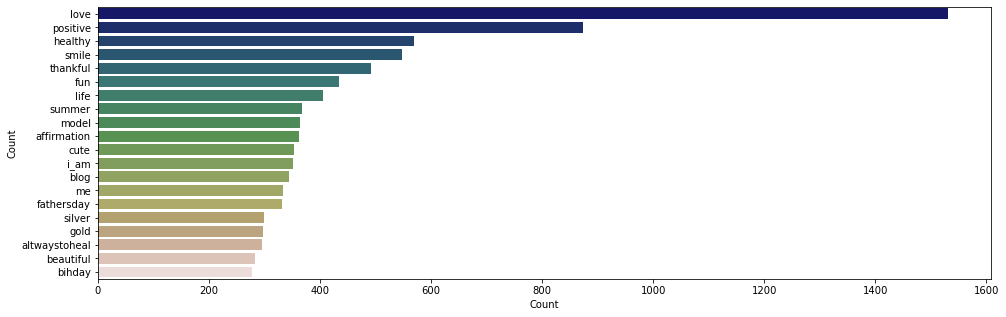

In [22]:
# Regular or positive Hashtag
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, y="Hashtag", x="Count", palette="gist_earth")
ax.set(ylabel='Count')
plt.show()


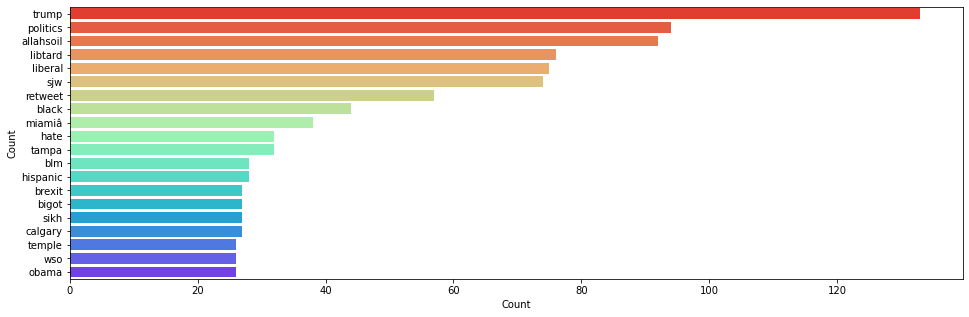

In [23]:
# Negative hashtag plot
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, y="Hashtag", x="Count", palette="rainbow_r")
ax.set(ylabel='Count')
plt.show()


In [85]:
# tokenizing the words present in the training set
import gensim
tokenized_tweet = df_train['tweet'].apply(lambda x: x.split())
tokenized_tweet_test = df_test['tweet'].apply(lambda x: x.split())

# importing gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,  # desired no. of features/independent variables
    window=5,  # context window size
    min_count=2,
    sg=1,  # 1 for skip-gram model
    hs=0,
    negative=10,  # for negative sampling
    workers=2,  # no.of cores
    seed=34)

model_w2v.train(tokenized_tweet, total_examples=len(
    df_train['tweet']), epochs=20)


(6109793, 8411580)

In [25]:
model_w2v.wv.most_similar(positive="happy")


[('saturday,', 0.5196030735969543),
 ('fasting,happy', 0.51884925365448),
 ('holiday,always', 0.49078255891799927),
 ('â\x9c\x8cð\x9f\x96\x90ð\x9f\x91\x80ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x8fð\x9f\x98\x81ð\x9f\x98\x9c',
  0.4824235141277313),
 ('tu', 0.48141640424728394),
 ('yul', 0.47955605387687683),
 ('oppa', 0.47500765323638916),
 ('jurgen', 0.47353583574295044),
 ('hoshi', 0.4717280864715576),
 ('#days13', 0.466566801071167)]

In [26]:
model_w2v.wv.most_similar(positive="excited")


[('omw', 0.5109876990318298),
 ('paicipate', 0.49461203813552856),
 ('album!', 0.4919597804546356),
 ('excited!!!', 0.4887978434562683),
 ('futureâ\x80¦', 0.48863309621810913),
 ('disturbing,', 0.48817822337150574),
 ('busy!', 0.48469799757003784),
 ('stoked', 0.48094800114631653),
 ('#singersongwriter', 0.4806506037712097),
 ('homeless', 0.4791128933429718)]

In [27]:
model_w2v.wv.most_similar(positive="family")


[('integral', 0.5941687822341919),
 ('bonding', 0.5862548351287842),
 ('lawyer', 0.5797789692878723),
 ('#lollipop', 0.5779297351837158),
 ('#piggies', 0.5696378350257874),
 ('#finger', 0.5666828155517578),
 ('\\', 0.5604351758956909),
 ('vacations.', 0.5588263869285583),
 ('#nomnom', 0.5570951104164124),
 ('#peppa', 0.5498205423355103)]

In [28]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [29]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output


# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]


[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

## Data Preprocesing

In [30]:
lst_stopwords = stopwords.words("english")
lst_stopwords


def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    """
    Preprocess a string.
    :parameter
        :param text: string - name of column containing text
        :param lst_stopwords: list - list of stopwords to remove
        :param flg_stemm: bool - whether stemming is to be applied
        :param flg_lemm: bool - whether lemmitisation is to be applied
    :return
        cleaned text
    """

    # clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    # Tokenize (convert from string to list)
    lst_text = text.split()
    # remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    # Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    # back to string from list
    text = " ".join(lst_text)
    return text


def remove_pattern(input_txt):
    r = re.findall(r"@(\w+)", input_txt)
    for i in r:
        input_txt = re.sub(f'@{i}', '', input_txt)
    return input_txt


def preprocess_tweet(row):
    text = row['clean_tweet1']
    text = p.clean(text)
    return text


def preprocessing_text(text):
    # Make lowercase
    text = text.str.lower()
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '', regex=True)
    # Remove digits
    text = text.str.replace('[\d]+', '', regex=True)
    return text


pd.set_option('max_colwidth', 500)


In [31]:
# preprocesing of the data train
df_train['clean_tweet'] = df_train['tweet'].apply(lambda x: remove_pattern(x))
df_train['clean_tweet1'] = df_train["tweet"].apply(lambda x: utils_preprocess_text(
    x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
df_train['clean_tweet1'] = df_train.apply(preprocess_tweet, axis=1)
df_train['clean_tweet1'] = preprocessing_text(df_train['clean_tweet1'])
df_train.tail()


,id,label,tweet,len,word_counts,clean_tweet,clean_tweet1
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,68,5,ate isz that youuu?ðððððððððâ¤ï¸,ate user isz youuu
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,131,23,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,see nina turner airwave trying wrap mantle genuine hero like shirley chisolm shame imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,63,13,listening to sad songs on a monday morning otw to work is sad,listening sad song monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",67,10,"#sikh #temple vandalised in in #calgary, #wso condemns act",user sikh temple vandalised calgary wso condemns act
31961,31962,0,thank you @user for you follow,32,6,thank you for you follow,thank user follow


In [32]:
# Preprocessing of test dataset
df_test['clean_tweet'] = df_test['tweet'].apply(lambda x: remove_pattern(x))
df_test['clean_tweet1'] = df_test["tweet"].apply(lambda x: utils_preprocess_text(
    x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
df_test['clean_tweet1'] = df_test.apply(preprocess_tweet, axis=1)
df_test['clean_tweet1'] = preprocessing_text(df_test['clean_tweet1'])
df_test.tail()


,id,tweet,len,clean_tweet,clean_tweet1
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,108,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory leftright polarisation trump uselections leadership politics brexit blm gt
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,96,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like mermaid hairflip neverready formal wedding gown dress mermaid
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",145,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",hillary campaigned today ohioomg amp used word like assetsampliability never clinton say theeword radicalization
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",104,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy work conference right mindset lead cultureofdevelopment organization work mindset
17196,49159,"my song ""so glad"" free download! #shoegaze #newmusic #newsong",64,"my song ""so glad"" free download! #shoegaze #newmusic #newsong",song glad free download shoegaze newmusic newsong


In [33]:
#remove_pattern('@user when a father is dysfunctional and his son is a good')
df_train['tweet'][df_train['label'] == 0][:10]


0                                              @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
1                         @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
2                                                                                                                                bihday your majesty
3                                                             #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
4                                                                                                             factsguide: society now    #motivation
5                               [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
6                                                                          @user camping tomorrow @user @u

In [34]:
df_train.head()


,id,label,tweet,len,word_counts,clean_tweet,clean_tweet1
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102,18,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user father dysfunctional selfish drag kid dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122,19,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked
2,3,0,bihday your majesty,21,3,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,14,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love u take u time ur
4,5,0,factsguide: society now #motivation,39,4,factsguide: society now #motivation,factsguide society motivation


In [35]:
a = df_train['clean_tweet1'].str.cat(sep=' ')
words = word_tokenize(a)
word_dist = FreqDist(words)
dff = pd.DataFrame(word_dist.most_common(),
                   columns=['Word', 'Frequency'])
dff['Word_Count'] = dff.Word.apply(len)
dff[:5]


,Word,Frequency,Word_Count
0,user,17500,4
1,love,2774,4
2,day,2768,3
3,happy,1691,5
4,u,1657,1


<AxesSubplot:xlabel='Frequency', ylabel='Word'>

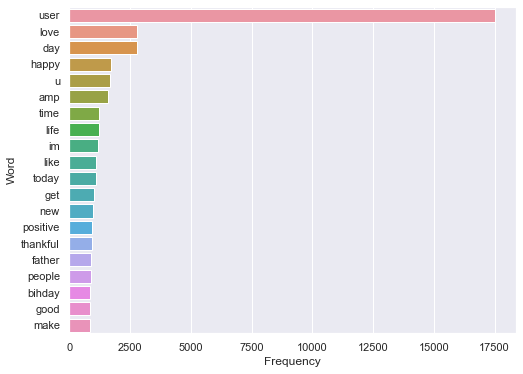

In [36]:
# Most Used Hashtahs and its frequency
sns.set(rc={'figure.figsize': (8, 6)})
sns.barplot(y=dff['Word'][:20], x=dff['Frequency'][:20])


<AxesSubplot:xlabel='Frequency', ylabel='Word'>

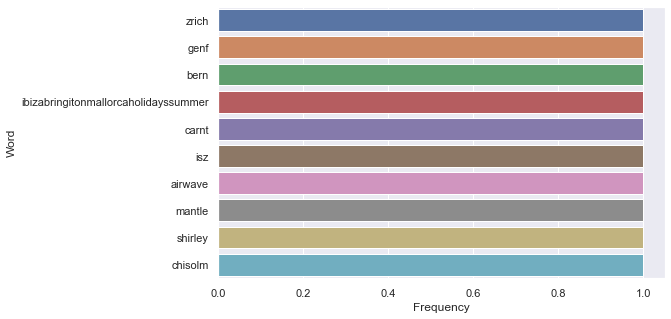

In [37]:
# Least Used Hashtag and its frequency                       )
sns.set(rc={'figure.figsize': (8, 5)})
sns.barplot(y=dff['Word'].tail(10), x=dff['Frequency'].tail(10))


In [38]:
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag, download
from collections import Counter
tokenizer = RegexpTokenizer(r'\w+')
df_train['token_tweet'] = df_train['clean_tweet1'].apply(tokenizer.tokenize)
df_train['postag_tweet'] = df_train['token_tweet'].apply(lambda x: pos_tag(x))


In [39]:
counts = Counter(tag for df_train['token_tweet'].iloc[1],
                 tag in df_train['postag_tweet'].iloc[1])
print(counts, df_train['tweet'].iloc[1])
df_train.head()


Counter({'NN': 8, 'VBP': 2, 'VBD': 2, 'RB': 1, 'JJ': 1, 'NNS': 1}) @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked


D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,label,tweet,len,word_counts,clean_tweet,clean_tweet1,token_tweet,postag_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102,18,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user father dysfunctional selfish drag kid dysfunction run,"[user, father, dysfunctional, selfish, drag, kid, dysfunction, run]","[(user, NN), (father, RBR), (dysfunctional, JJ), (selfish, JJ), (drag, NN), (kid, NN), (dysfunction, NN), (run, VB)]"
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122,19,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked,getthanked,"[(user, RB), (user, JJ), (thanks, NNS), (lyft, VBP), (credit, NN), (cant, NN), (use, NN), (cause, NN), (dont, NN), (offer, VBP), (wheelchair, NN), (van, NN), (pdx, NN), (disapointed, VBD), (getthanked, VBD)]"
2,3,0,bihday your majesty,21,3,bihday your majesty,bihday majesty,"[bihday, majesty]","[(bihday, NN), (majesty, NN)]"
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,14,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love u take u time ur,"[model, love, u, take, u, time, ur]","[(model, NN), (love, NN), (u, JJ), (take, VB), (u, JJ), (time, NN), (ur, JJ)]"
4,5,0,factsguide: society now #motivation,39,4,factsguide: society now #motivation,factsguide society motivation,"[factsguide, society, motivation]","[(factsguide, RB), (society, NN), (motivation, NN)]"


(31962, 1000)
(31962,)
1000


Text(0.5, 1.0, 'Sparse Matrix Sample')

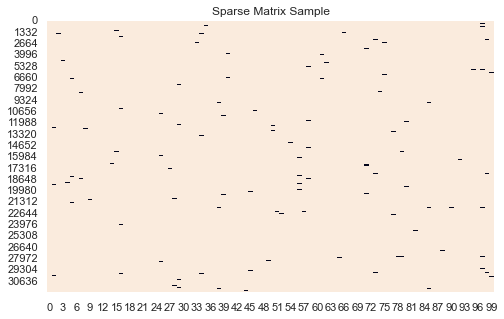

In [40]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000)
bow = cv.fit_transform(df_train['clean_tweet1']).toarray()
y = df_train.iloc[:, 1]

print(bow.shape)
print(y.shape)
print(len(cv.get_feature_names()))
sns.heatmap(bow[:, np.random.randint(0, bow.shape[1], 100)] == 0,
            vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')


## Model Creation and evaluation

#### Bag of words

In [108]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000)
test_bow = cv.fit_transform(df_test['clean_tweet1']).toarray()

print(test_bow.shape)
print(len(cv.get_feature_names()))


(17197, 1000)
1000


#### TF-IDF

In [109]:
# creating tf-idf vectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df_train['clean_tweet1'])
tfidf.shape
test_tfidf = tfidf_vectorizer.fit_transform(df_test['clean_tweet1']).toarray()

print(test_bow.shape)
print(len(tfidf_vectorizer.get_feature_names()))


(17197, 1000)
1000


In [110]:
X_data, y_data = np.array(
    df_train['clean_tweet1']), np.array(df_train['label'])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.05, random_state=0)
print('Data Split done.')


Data Split done.


#### Word Embedding

In [86]:
# Generating word Embedding
from gensim.models import Word2Vec


def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv.get_vector(word).reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec


wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
print(wordvec_df.shape)

wordvec_arrays_test = np.zeros((len(tokenized_tweet_test), 200))
for i in range(len(tokenized_tweet_test)):
    wordvec_arrays_test[i, :] = word_vector(tokenized_tweet_test[i], 200)
wordvec_df_test = pd.DataFrame(wordvec_arrays_test)
print(wordvec_df_test.shape)

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), df_train['clean_tweet1']))
# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                          vector_size=Embedding_dimensions,
                          workers=8,
                          min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))


(31962, 200)
(17197, 200)
Vocabulary Length: 5791


In [46]:
word2vec_model.wv.most_similar('good')


[('morning', 0.9143092036247253),
 ('yeah', 0.8799386024475098),
 ('aww', 0.8642780780792236),
 ('bong', 0.8380767107009888),
 ('bing', 0.8376035094261169),
 ('trained', 0.8354294300079346),
 ('feeling', 0.8301172852516174),
 ('luck', 0.8273354172706604),
 ('everyone', 0.7859964370727539),
 ('night', 0.7832521796226501)]

In [47]:
print(len(word2vec_model.wv.get_vector('good')))
word2vec_model.wv.get_vector('good')


100


array([ 5.3336805e-01,  3.6465678e-02,  2.7796578e-01, -4.7626385e-01,
       -4.7554022e-01, -1.7775631e+00, -5.7959139e-01,  9.5137805e-01,
       -1.3671604e+00, -8.8399428e-01,  5.1731741e-01, -1.0318526e+00,
       -6.9493270e-01,  4.0610039e-01,  7.1055524e-02, -5.8045995e-01,
        6.2736672e-01, -2.6024866e-01, -9.4571650e-02, -9.5596820e-01,
        7.0927799e-01, -7.1227401e-01,  4.9789649e-01, -4.4580972e-01,
       -4.5235062e-01, -4.7654912e-01, -1.5817611e-01,  2.7513599e-02,
        5.8050364e-01, -3.0667394e-01,  4.2531490e-01,  1.4395607e-01,
       -1.1852536e-01, -1.0114019e+00, -7.1935624e-01, -7.4002570e-01,
        5.6104290e-01, -5.5099905e-01,  4.7603738e-01, -7.3753762e-01,
       -2.1676405e-01, -6.8671912e-02,  1.8363170e-01,  9.1140699e-01,
        3.6286750e-01, -2.5320545e-01, -6.5252656e-01, -1.2592037e+00,
        1.0879222e+00,  5.0401115e-01, -1.6499203e-02, -2.0390861e-01,
        4.9376649e-01, -3.2392690e-01, -5.5263901e-01,  2.3795463e-01,
      

In [48]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
input_length = 60


vocab_length = 60000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)
X_train = pad_sequences(
    tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test = pad_sequences(
    tokenizer.texts_to_sequences(X_test), maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)


Tokenizer vocab length: 60000
X_train.shape: (30363, 60)
X_test.shape : (1599, 60)


In [49]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)


Embedding Matrix Shape: (60000, 100)


### Now we have 100 new features, whereas in Bag of Words and TF-IDF we had 10000 features.

In [50]:
# doc2vec
model_d2v = gensim.models.Doc2Vec(dm=1,  # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1,  # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200,  # no. of desired features
                                  window=5,  # width of the context window
                                  negative=7,  # if > 0 then negative sampling will be used
                                  # Ignores all words with total frequency lower than 5.
                                  min_count=5,
                                  workers=32,  # no. of cores
                                  alpha=0.1,  # learning rate
                                  seed=23,  # for reproducibility
                                  )

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples=len(
    df_train['clean_tweet1']), epochs=15)


100%|██████████| 31962/31962 [00:00<00:00, 1998842.14it/s]


In [89]:
tokenized_tweet = df_train.clean_tweet1.apply(lambda x: x.split())
tokenized_tweet_test = df_test.clean_tweet1.apply(lambda x: x.split())
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(df_train)):
    docvec_arrays[i, :] = model_d2v.dv[i].reshape((1, 200))

docvec_arrays_test = np.zeros((len(tokenized_tweet_test), 200))
for i in range(len(df_test)):
    docvec_arrays_test[i, :] = model_d2v.dv[i].reshape((1, 200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df_test = pd.DataFrame(docvec_arrays_test)
print(docvec_df.shape, docvec_df_test.shape)


(31962, 200) (17197, 200)


We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

- Logistic Regression
- Support Vector Machine
- RandomForest
- XGBoost

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


## Logistic Regression

In [53]:
# Extracting train and test BoW features
train_bow = bow[:31962, :]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(
    train_bow, df_train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression(solver='lbfgs')

# training the model
lreg.fit(xtrain_bow, ytrain)
prediction = lreg.predict_proba(xvalid_bow)  # predicting on the validation set
# if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)  # calculating f1 score for the validation set


0.5325542570951586

In [54]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(int)
df_test['label'] = test_pred_int
submission = df_test[['id', 'tweet', 'label']]
# writing data to a CSV file
submission.to_csv('sub_lreg_bow.csv', index=False)
submission.sample(5)


,id,tweet,label
5791,37754,@user ig - #bora update: happy bihday to our maknaeððð bihday #dasom #bihday #letshaveapay #â¤ï¸,0
8706,40669,nottingham on tuesday for my friends bihday. we are going to a cat cafe!!! #kitty's #cute,0
15056,47019,so for @user ...#summercamp @user @user,0
8022,39985,moving day. new apament. sexy view. fish aquarium. #singapore #bishan #punjabimates,0
1358,33321,it is really no surprise to see you @user jealous of mateen's #orlando49 miscegenation genocide. @user,0


In [55]:
train_tfidf = tfidf[:31962, :]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)

prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(yvalid, prediction_int)  # calculating f1 score for the validation set


0.5326184092940125

In [95]:
train_w2v = wordvec_df.iloc[:31962, :]
test_w2v = wordvec_df_test.iloc[:31962, :]


xtrain_w2v = train_w2v.iloc[ytrain.index, :]
xvalid_w2v = train_w2v.iloc[yvalid.index, :]

lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)

prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(yvalid, prediction_int)


0.5692541856925418

In [91]:
train_d2v = docvec_df.iloc[:31962, :]
test_d2v = docvec_df_test.iloc[31962:, :]

xtrain_d2v = train_d2v.iloc[ytrain.index, :]
xvalid_d2v = train_d2v.iloc[yvalid.index, :]

lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)

prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(yvalid, prediction_int)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.34215167548500885

## SVM

In [58]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)


0.49253731343283574

In [59]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)


0.49492151431209597

In [60]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)
prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)


0.5662551440329218

In [61]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)
prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)


0.10850801479654747

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)  # validation score


0.4864

In [63]:
rf = RandomForestClassifier(
    n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)
prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)


0.5

In [64]:
rf = RandomForestClassifier(
    n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)
prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)


0.4055299539170507

In [65]:
rf = RandomForestClassifier(
    n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)
prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)


0.005830903790087463

## XGBoost

In [66]:
#!pip install xgboost


In [67]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)


D:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:42:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5283363802559414

In [68]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)


D:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:45:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5115420129270545

In [69]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000,
                    nthread=3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)


D:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5842055185537584

In [70]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000,
                    nthread=3).fit(xtrain_d2v, ytrain)
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)


D:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.3229527104959631

## FineTuning XGBoost + Word2Vec

In [96]:
import xgboost as xgb
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)
print(dtest.num_col(), dtest.num_row())
# Parameters that we are going to tune
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': .3,
    'subsample': 1,
    'colsample_bytree': 1
}


def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(int)
    preds = (preds >= 0.3).astype(int)
    return [('f1_score', f1_score(labels, preds))]


200 17197


In [73]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6, 10)
    for min_child_weight in range(5, 8)
]

max_f1 = 0.  # initializing with 0

best_params = None

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
        max_depth, min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval=custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

# Finding best F1 Score
mean_f1 = cv_results['test-f1_score-mean'].max()
boost_rounds = cv_results['test-f1_score-mean'].idxmax()
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))

if mean_f1 > max_f1:
    max_f1 = mean_f1
    best_params = (max_depth, min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(
    best_params[0], best_params[1], max_f1))


CV with max_depth=6, min_child_weight=5
[23:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:29] WARNING: C:/Users/A

In [74]:
params['max_depth'] = 9
params['min_child_weight'] = 7
params['eval_metric'] = "logloss"

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5, 10)]
    for colsample in [i/10. for i in range(5, 10)]
]

max_f1 = 0.
best_params = None

for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(subsample, colsample))

    # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample

    cv_results = xgb.cv(
        params,
        dtrain,
        feval=custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))

    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample)

print("Best params: {}, {}, F1 Score: {}".format(
    best_params[0], best_params[1], max_f1))


CV with subsample=0.5, colsample=0.5
[00:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample"

In [107]:
# Let’s have a look at the final list of tuned parameters.

params = {
    'colsample': 0.9,
    'colsample_bytree': 0.5,
    'eta': 0.1,
    'max_depth': 9,
    'min_child_weight': 7,
    'objective': 'binary:logistic',
    'subsample': 0.9,
    'eval_metric': 'logloss'
}
xgb_model = xgb.train(
    params,
    dtrain,
    feval=custom_eval,
    num_boost_round=1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
)


[20:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-logloss:0.61733	Validation-f1_score:0.00000
[1]	Validation-logloss:0.55518	Validation-f1_score:0.02597
[2]	Validation-logloss:0.50303	Validation-f1_score:0.19763
[3]	Validation-logloss:0.45898	Validation-f1_score:0.21121
[4]	Validation-logloss:0.42158	Validation-f1_score:0.23620
[5]	Validation-logloss:0.38952	Validation-f1_score:0.25445
[6]	Validation-logloss:0.36173	Validation-f1_score:0.25667
[7]	Validation-logloss:0.33736	Validation-f1_score:0.27102
[8]	Validation-logloss:0.31628	Validation-f1_score:0.27102
[9]	Validation-logloss:0.29764	Validation-f1_score:

In [100]:
test_pred = xgb_model.predict(dtest)
# test_pred
df_test['label'] = (test_pred >= 0.3).astype(int)
submission = df_test[['id', 'tweet', 'label']]
submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)


## Conclusion

| Model/Method        | Bag of word | TF-IDF | Word2Vec | Doc2Vec |
|---------------------|-------------|--------|----------|---------|
| Logistic Regression | 0.53        | 0.53   | 0.57     | 0.34    |
| SVM                 | 0.4925      | 0.4949 | 0.566    | 0.108   |
| Random Forest       | 0.4864      | 0.5    | 0.405    | 0.005   |
| XGBoost             | 0.53        | 0.51   | __0.58__ | 0.32    |

__Word2Vec features__ turned out to be most useful. Whereas __XGBoost__ with Word2Vec features was the best model for this problem. This clearly shows the power of word embeddings in dealing with NLP problems.